# mouse TK data 

In [19]:
import pandas as pd

In [20]:
mouse_tk = pd.read_excel("C:/switchdriver/dataset/tk/mouse_tk.xlsx", None)
pub_info = pd.read_csv("C:/switchdriver/dataset/tk/mouse_tk_link_info.csv")

In [32]:
# assign a id to each study
c = pub_info.PMID.astype('category')
d = dict(enumerate(c.cat.categories))
pub_info['Study_id'] = pub_info.PMID.astype('category').cat.codes
pub_info.to_csv("C:/switchdriver/dataset/tk/mouse_tk_link_info.csv")

In [38]:
with pd.ExcelWriter("C:/switchdriver/dataset/tk/mouse_tk_detailed.xlsx") as writer: 
    for i in mouse_tk.keys():
        df_i = pd.read_excel("C:/switchdriver/dataset/tk/mouse_tk.xlsx", i)
#         print(df_i.columns)
        df_i.PMID = df_i.PMID.astype(str)
        new_df = pd.merge(df_i,pub_info, on="PMID",how="left")
        print(i)
        new_df.to_excel(writer,sheet_name=i)

Spleen
Lung
Liver
Blood
Stomach
Intestine
Kidney
Heart
Brain
Bone
Pancreas
Skin
Tail
Muscle


In [122]:
year = pub_info['Year of publication'].value_counts().to_frame().sort_index()

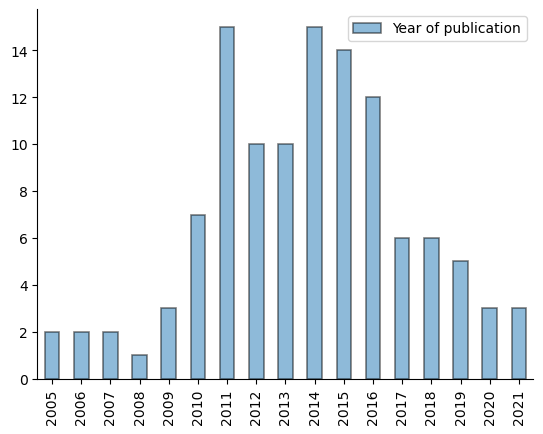

In [123]:
ax = year.plot(kind='bar',alpha=0.5,edgecolor='black', linewidth=1.2)
# ax.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# GET mouse TK data

In [39]:
mouse_tk_all = pd.read_excel("C:/switchdriver/dataset/tk/mouse_tk_detailed.xlsx", None)
ls_sheet = [i for i in mouse_tk_all.keys()]

In [40]:
ls_sheet

['Spleen',
 'Lung',
 'Liver',
 'Blood',
 'Stomach',
 'Intestine',
 'Kidney',
 'Heart',
 'Brain',
 'Bone',
 'Pancreas',
 'Skin',
 'Tail',
 'Muscle']

In [41]:
df_liver = pd.read_excel("C:/switchdriver/dataset/tk/mouse_tk_detailed.xlsx", 'Liver')
df_liver.columns

Index(['Unnamed: 0', 'ID', 'Time_h', 'perc_ID_g', 'Species', 'Age/weight',
       'Strain', 'Organ', 'Size_nm', 'Analysis method', 'NP_Type', 'NP_Shape',
       'Ligand', 'Charge', 'PEG cover', 'PMID', 'Name', 'Paper Title',
       'Publication link', 'Year of publication', 'Study_id'],
      dtype='object')

In [46]:
df_liver.Study_id.value_counts()[:10]

84    35
94    32
5     22
12    21
88    18
13    16
65    12
64    12
48    12
42    12
Name: Study_id, dtype: int64